# Equifax Raw Data EDA

In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os.path

from data.data import data

%matplotlib inline

con = pyodbc.connect('DSN=Wongalb')

In [9]:
StartDates = "'2017-11-01 00:00:00'"
CloseDates = "'2018-05-31 00:00:00'"
DaysMature = 8
Category = 0

In [7]:
nb_dir = os.path.split(os.getcwd())[0]
cwd = os.getcwd()

In [5]:
df = data(StartDates,CloseDates=CloseDates,DaysMature=DaysMature,Category=Category)

In [10]:
cat_features = [f for f in df.columns if df[f].dtype == 'object']
for f_ in cat_features:
    df[f_]=pd.to_numeric(df[f_],errors='ignore')
print (df.shape)
df.head(5)

(9875, 39)


,id_soli,Badness7D,Badness30D,creation_date,creation_YM,score_Band,score,InCais,count_transactions,evaluation,...,unpaid_balance_mortgage_balance,unpaid_balance_personal_Loan_balance,unpaid_balance_credit_card_balance,unpaid_balance_telecom_balance,unpaid_balance_other_products_balance,worst_unpaid_balance,worst_situation,number_of_days_in_worst_situation,number_of_creditors_in_asnef,number_of_delinquency_days
id_pres,,,,,,,,,,,,,,,,,,,,,
1261415,360437,0,0.0,2017-11-01,201711,850 - 900,884,0,NaN,A,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0
1261425,327967,0,0.0,2017-11-01,201711,700 - 750,722,0,NaN,C,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0
1261441,359954,0,0.0,2017-11-01,201711,750 - 800,783,0,NaN,C,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0
1261481,338889,1,1.0,2017-11-01,201711,700 - 750,746,0,NaN,C,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0
1261483,360450,0,0.0,2017-11-01,201711,800 - 850,847,0,NaN,B,...,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0


In [11]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [12]:
missing_data(df).head(9)

,Total,Percent
original_request_id,9103,92.182278
worst_situation,7242,73.336709
severity,5228,52.941772
Badness30D,1100,11.139241
date_request,772,7.817722
count_transactions,325,3.291139
number_of_delinquency_days,16,0.162025
total_number_of_other_unpaid_operations,16,0.162025
total_number_of_operations,16,0.162025


In [13]:
df_clean = df[(df.evaluation!='-') & (np.isfinite(df['count_transactions'])) & 
              (np.isfinite(df['total_unpaid_balance']))].drop(['Badness30D','original_request_id'],axis=1)
missing_data(df_clean).head(5)

,Total,Percent
worst_situation,6995,91.342387
severity,5063,66.113868
date_request,738,9.636981
number_of_delinquency_days,0,0.000000
evaluation,0,0.000000


In [14]:
# df_clean[ (df_clean.count_transactions.isnull()) & (df_clean.original_request_id!=np.NaN) ].groupby(['creation_date']).size()

In [15]:
features = df_clean.columns
features

Index(['id_soli', 'Badness7D', 'creation_date', 'creation_YM', 'score_Band',
       'score', 'InCais', 'count_transactions', 'evaluation', 'severity',
       'igm', 'error', 'created_at', 'updated_at', 'date_request',
       'communication_packet_hash', 'total_number_of_operations',
       'total_number_of_consumer_credit_operations',
       'total_number_of_mortgage_operations',
       'total_number_of_personal_loan_operations',
       'total_number_of_credit_card_operations',
       'total_number_of_telecom_operations',
       'total_number_of_other_unpaid_operations', 'total_unpaid_balance',
       'total_unpaid_balance_own_entity',
       'total_unpaid_balance_of_other_entities',
       'unpaid_balance_consumer_credit_balance',
       'unpaid_balance_mortgage_balance',
       'unpaid_balance_personal_Loan_balance',
       'unpaid_balance_credit_card_balance', 'unpaid_balance_telecom_balance',
       'unpaid_balance_other_products_balance', 'worst_unpaid_balance',
       'worst_situ

In [16]:
df_clean.describe(percentiles=[.90, .95, .98,.99] ).transpose().round(decimals=0)

,count,mean,std,min,50%,90%,95%,98%,99%,max
id_soli,7658.0,356189.0,68659.0,390.0,374777.0,400406.0,405957.0,409307.0,412246.0,418369.0
Badness7D,7658.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
creation_YM,7658.0,201773.0,43.0,201711.0,201801.0,201804.0,201804.0,201805.0,201805.0,201805.0
score,7658.0,778.0,71.0,640.0,783.0,874.0,895.0,914.0,929.0,984.0
InCais,7658.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
count_transactions,7658.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,18.0
total_number_of_operations,7658.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,19.0
total_number_of_consumer_credit_operations,7658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
total_number_of_mortgage_operations,7658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
total_number_of_personal_loan_operations,7658.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0


In [17]:
Bads = df_clean['Badness7D'].value_counts()

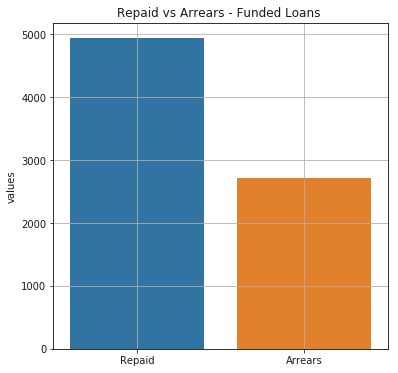

Average arrears rate 7dpd: 35.5%


In [18]:
df_plot = pd.DataFrame({'labels': Bads.index,'values': Bads.values})

plt.figure(figsize = (6,6))

plt.title('Repaid vs Arrears - Funded Loans ')
sns.set_color_codes("pastel")
sns.barplot(x = ['Repaid','Arrears'], y="values", data=df_plot)
locs, labels = plt.xticks()
plt.grid()
plt.show()

print('Average arrears rate 7dpd:','{:.1%}'.format(df_plot.iloc[1,1]/df_plot.values.sum()))

In [19]:
Monthly_Bads = df_clean[['creation_YM','Badness7D']].groupby(['creation_YM']).agg({'count', 'sum'}).reset_index().rename(columns={'sum':'Bads','count':'Total'})
Monthly_Bads['Goods']=Monthly_Bads.Badness7D.Total-Monthly_Bads.Badness7D.Bads
Monthly_Bads['Avg']=Monthly_Bads.Badness7D.Bads/Monthly_Bads.Badness7D.Total
Monthly_Bads.columns = Monthly_Bads.columns.droplevel()
Monthly_Bads.columns = ['creation_YM','Bads','Total','Goods','Avg']
Monthly_Bads = Monthly_Bads[['creation_YM','Bads','Goods','Total','Avg']]
Monthly_Bads

,creation_YM,Bads,Goods,Total,Avg
0,201711,1250,859,391,0.312800
1,201712,1263,778,485,0.384006
2,201801,1415,869,546,0.385866
3,201802,1246,782,464,0.372392
4,201803,1404,895,509,0.362536
5,201804,920,631,289,0.314130
6,201805,160,126,34,0.212500


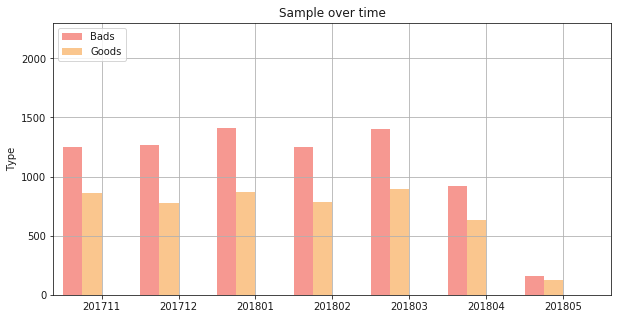

In [20]:
def plot_grouped_bars(df,X_label):
    # Setting the positions and width for the bars
    pos = list(range(len(df['Bads']))) 
    width = 0.25 

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data,
    # in position pos,
    plt.bar(pos, 
            #using df['Bads'] data,
            df['Bads'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#EE3224', 
            # with label the first value in first_name
            label=df[X_label][0]) 

    # Create a bar with mid_score data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
            #using df['mid_score'] data,
            df['Goods'],
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#F78F1E', 
            # with label the second value in first_name
            label=df[X_label][1]) 

    # Set the y axis label
    ax.set_ylabel('Type')

    # Set the chart's title
    ax.set_title('Sample over time')

    # Set the position of the x ticks
    ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(df[X_label])

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, max(df['Bads'] + df['Goods'])] )

    # Adding the legend and showing the plot
    plt.legend(['Bads', 'Goods'], loc='upper left')
    plt.grid()
    plt.show()
    
plot_grouped_bars(Monthly_Bads,'creation_YM')

In [21]:
Evaluation_Score = df_clean[['evaluation','score_Band','Badness7D']].groupby(['score_Band','evaluation']).agg({'count', 'sum'}).reset_index().rename(columns={'sum':'Bads','count':'Total'})
Evaluation_Score['Avg']=Evaluation_Score.Badness7D.Bads/Evaluation_Score.Badness7D.Total
Evaluation_Score.columns = Evaluation_Score.columns.droplevel()
Evaluation_Score.columns = ['score_Band','evaluation','Bads','Total','Avg']
Evaluation_Score.head(5)

,score_Band,evaluation,Bads,Total,Avg
0,600 - 650,A,19,10,0.526316
1,600 - 650,AA,1,0,0.000000
2,600 - 650,B,62,36,0.580645
3,600 - 650,C,52,20,0.384615
4,650 - 700,A,204,92,0.450980


In [114]:
Evaluation_Score_Avg = Evaluation_Score.pivot(index='score_Band', columns='evaluation', values='Avg')
Evaluation_Score_Avg

evaluation,A,AA,AAA,B,C,D
score_Band,,,,,,
600 - 650,0.526316,0.000000,NaN,0.580645,0.384615,NaN
650 - 700,0.450980,0.363636,0.500000,0.492908,0.475177,NaN
700 - 750,0.375887,0.076923,0.500000,0.425393,0.422993,NaN
750 - 800,0.321212,0.233333,0.500000,0.361602,0.394673,NaN
800 - 850,0.251627,0.254545,0.300000,0.289111,0.316327,0.446875
850 - 900,0.201365,0.204082,0.142857,0.209424,0.292135,0.296703
900 - 950,0.154472,0.150000,0.000000,0.212121,0.200000,0.437500
950 - 1000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [118]:
range(len(Evaluation_Score_Avg.index))

range(0, 8)

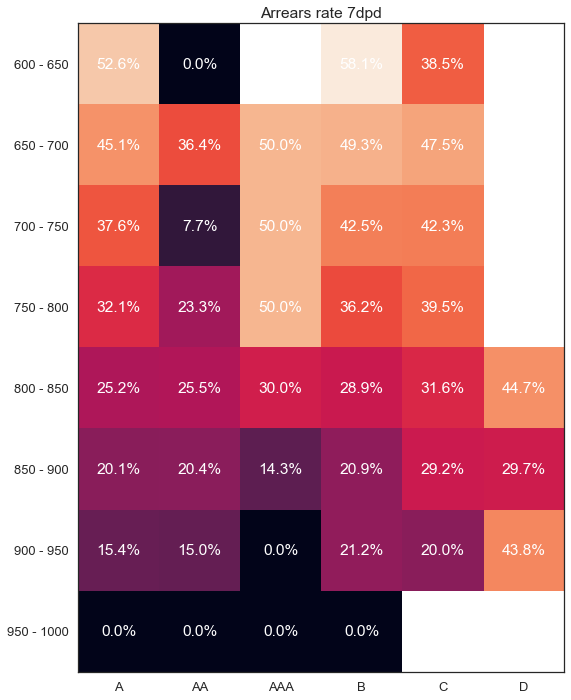

In [136]:
# Create a figure and a set of subplots
# This utility wrapper makes it convenient to create common layouts of subplots, 
# including the enclosing figure object, in a single call
# matplotlib.pyplot.subplots
# Returns: fig : matplotlib.figure.Figure object (I) & ax : Axes object or array of Axes objects (II)

fig, ax = plt.subplots(figsize=(15,10))
im = ax.imshow(Evaluation_Score_Avg)

# set columns and raws
ax.set_xticks(np.arange(len(Evaluation_Score_Avg.columns)))
ax.set_yticks(np.arange(len(Evaluation_Score_Avg.index)))

# set x and y labels 
ax.set_xticklabels(Evaluation_Score_Avg.columns)
ax.set_yticklabels(Evaluation_Score_Avg.index)

# Loop over data dimensions and create text annotations.
for i in range(len(Evaluation_Score_Avg.index)):
    for j in range(len(Evaluation_Score_Avg.columns)):
        text = ax.text(j, i, '{:.1%}'.format(Evaluation_Score_Avg.iloc[i, j]),
                       ha="center", va="center", color="w")
        
ax.set_title("Arrears rate 7dpd")

# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# This is an experimental feature and may not work for some cases.
# It only checks the extents of ticklabels, axis labels, and titles.
fig.tight_layout()

plt.show()

In [113]:
Evaluation_Score_Avg['x'] = range(1,len(Evaluation_Score_Avg)+1)
Evaluation_Score_Avg

evaluation,A,AA,AAA,B,C,D,x
score_Band,,,,,,,
600 - 650,0.526316,0.000000,NaN,0.580645,0.384615,NaN,1
650 - 700,0.450980,0.363636,0.500000,0.492908,0.475177,NaN,2
700 - 750,0.375887,0.076923,0.500000,0.425393,0.422993,NaN,3
750 - 800,0.321212,0.233333,0.500000,0.361602,0.394673,NaN,4
800 - 850,0.251627,0.254545,0.300000,0.289111,0.316327,0.446875,5
850 - 900,0.201365,0.204082,0.142857,0.209424,0.292135,0.296703,6
900 - 950,0.154472,0.150000,0.000000,0.212121,0.200000,0.437500,7
950 - 1000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,8


In [23]:
print ('Index levels:', Evaluation_Score_Avg.index.nlevels)
print ('Column levels:', Evaluation_Score_Avg.columns.nlevels)

Index levels: 1
Column levels: 1


In [50]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')
plt.figure(figsize=(100,20))

<Figure size 7200x1440 with 0 Axes>

<Figure size 7200x1440 with 0 Axes>

Text(0.5,1.02,'Arrears 7dpd by Score band & Equifax Score')

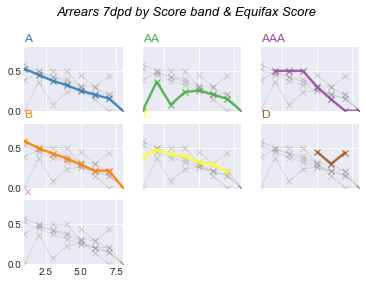

In [52]:
df = Evaluation_Score_Avg
# multiple line plot
num=0
for column in df:
    num+=1
    # Find the right spot on the plot
    plt.subplot(3,3,num)
 
    # plot every groups, but discreet
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], df[v], marker='x', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='x', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(1,8)
    plt.ylim(0,0.8)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom=False)
    if num not in [1,4,7] :
        plt.tick_params(labelleft=False)
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    
# Set size
# plt.figure(figsize=(40,40))
    
# general title
plt.suptitle("Arrears 7dpd by Score band & Equifax Score", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

In [98]:
def plot_stats(df, feature, metric, label_rotation = False, horizontal_layout = True):

    # Count total number of samples in each feature value 
    temp = df[feature].value_counts()
    
    # create dataframe containing data to plot
    df1 = pd.DataFrame({feature: temp.index,'Number of loans': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, metric]].groupby([feature],as_index=False).mean()
    
    # Sort by feature name 
    cat_perc.sort_values(by=feature, ascending=True, inplace=True)
    
    # if horizontal layout is set to True then:
    if(horizontal_layout):
        # Create figure 
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
    else:
        # Create figure 
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    
    sns.set_color_codes("pastel")
    
    s = sns.barplot(ax = ax1, x = feature, y = "Number of loans", order = cat_perc[feature], data = df1)
    
    # if label rotation has been set to True then
    if(label_rotation):
        # Set the x-tick labels with list of string labels and its rotation
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    
    # Show point estimates and confidence intervals as rectangular bars
    s = sns.barplot(ax = ax2, x = feature, y = metric, order = cat_perc[feature], data = cat_perc)
    
    # if label rotation has been set to True then
    if(label_rotation):
        # Set the x-tick labels with list of string labels and its rotation
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # Adjust the label of the y-axis
    plt.ylabel('Arrears rate [%]', fontsize=14)
    
    # Change the appearance of ticks, tick labels, and gridlines
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    # Show the plot
    plt.show();

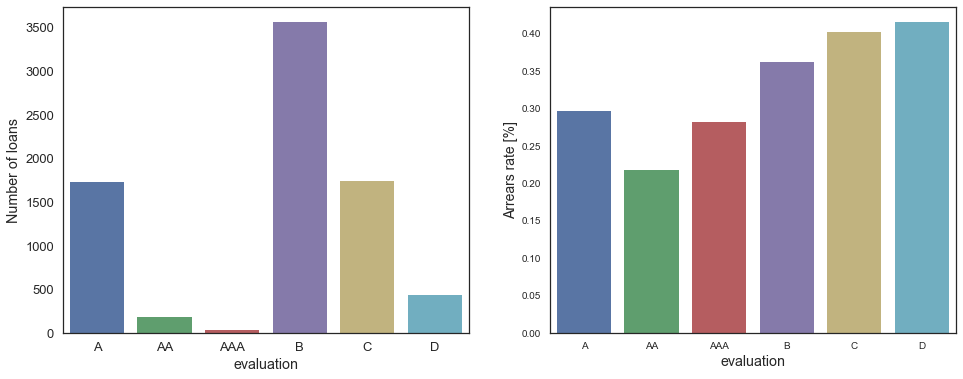

In [99]:
plot_stats(df_clean,'evaluation','Badness7D')

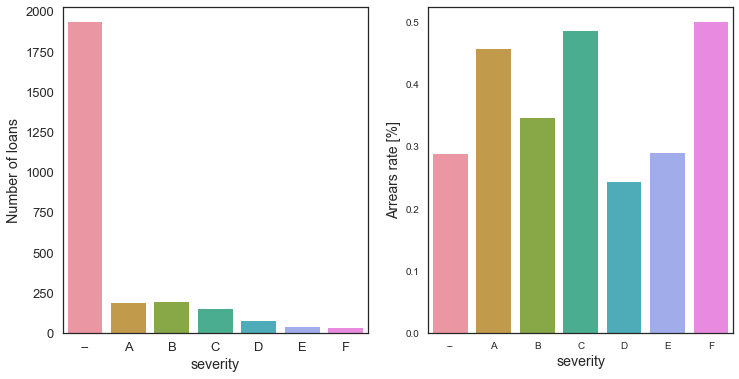

In [64]:
plot_stats(df_clean,'severity','Badness7D') 

### Total number of operations

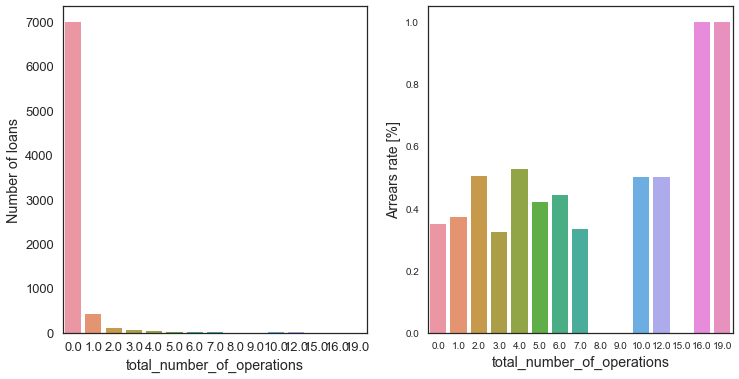

In [82]:
plot_stats(df_clean,'total_number_of_operations','Badness7D') 

### Total number of consumer credit operations

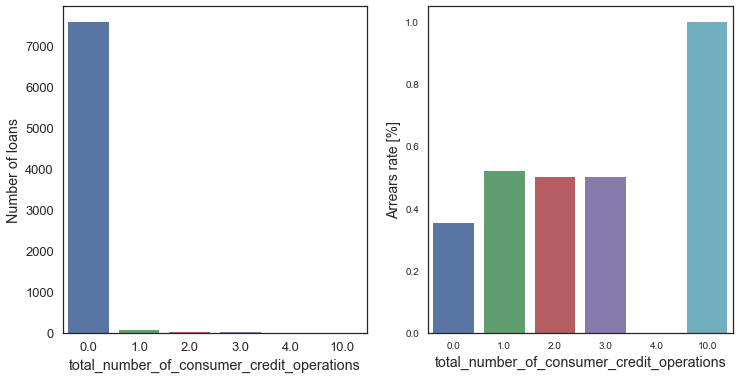

In [81]:
plot_stats(df_clean,'total_number_of_consumer_credit_operations','Badness7D') 

### Total number of mortgage operations

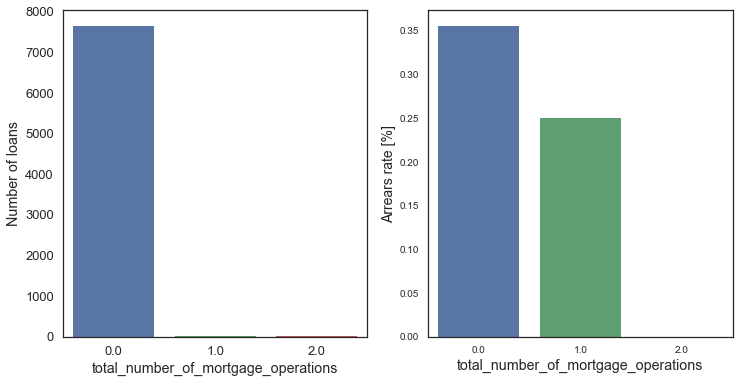

In [80]:
plot_stats(df_clean,'total_number_of_mortgage_operations','Badness7D') 

### Total number of personal loan operations

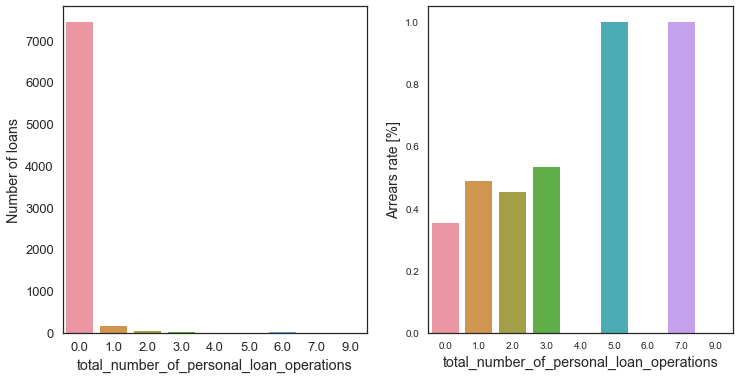

In [76]:
plot_stats(df_clean,'total_number_of_personal_loan_operations','Badness7D')

### Total number of credit card operations

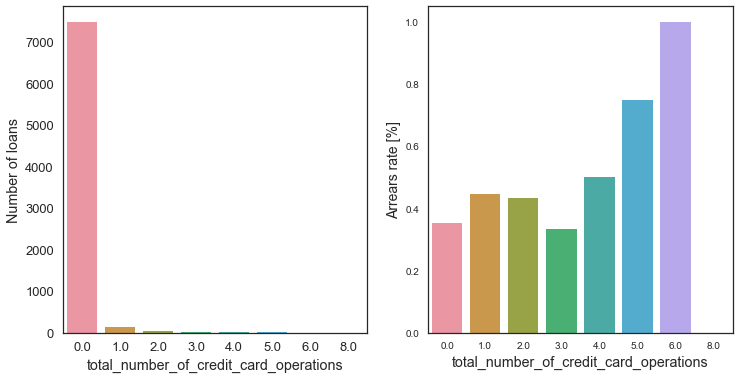

In [77]:
plot_stats(df_clean,'total_number_of_credit_card_operations','Badness7D')

### Total number of telecom operations

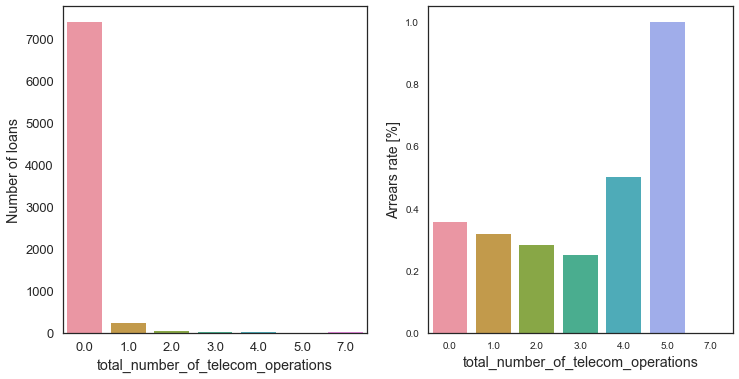

In [78]:
plot_stats(df_clean,'total_number_of_telecom_operations','Badness7D')

### Total number of other unpaid operations

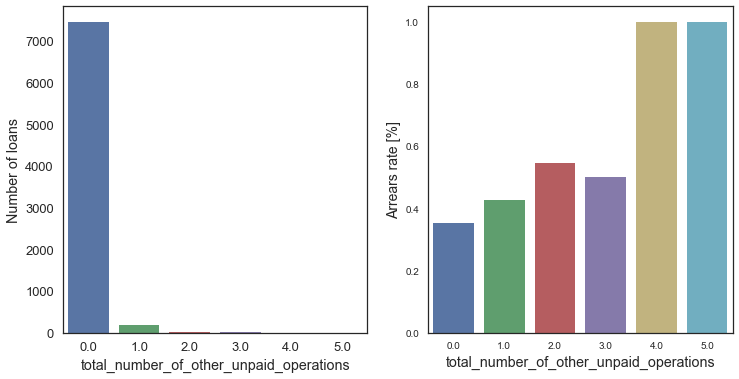

In [75]:
plot_stats(df_clean,'total_number_of_other_unpaid_operations','Badness7D')

### Worst situation

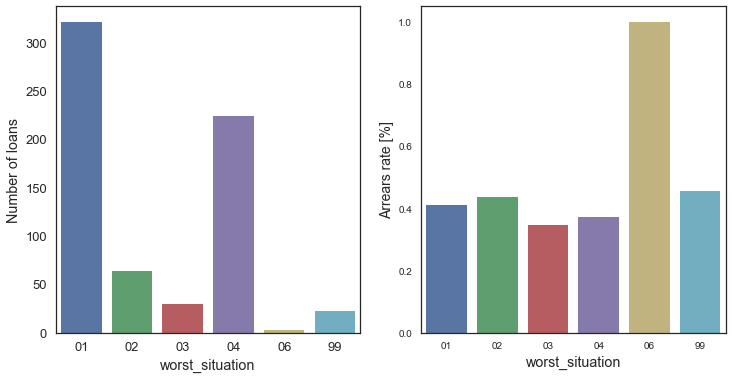

In [70]:
plot_stats(df_clean,'worst_situation','Badness7D')

### Number of creditors in ASNEF

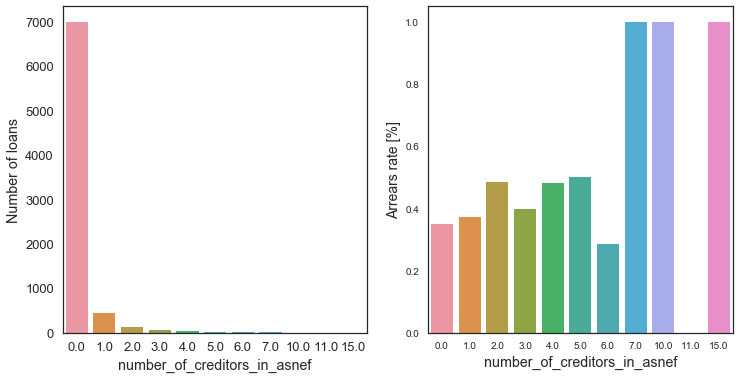

In [72]:
plot_stats(df_clean,'number_of_creditors_in_asnef','Badness7D')

In [205]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def PCA_2components(feature_string):
    # Separate features
    x = df_clean.filter(regex=feature_string)
    # print (x.values)
    y = df_clean['Badness7D']
    
    
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    df_PCAs = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([df_clean['Badness7D'].reset_index(),df_PCAs], axis = 1, ignore_index=True)
    finalDf.columns = ['id_pres','Badness7D','principal component 1','principal component 2']
    # print (finalDf.shape)
    # print (finalDf.values)

    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [1, 0]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Badness7D'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

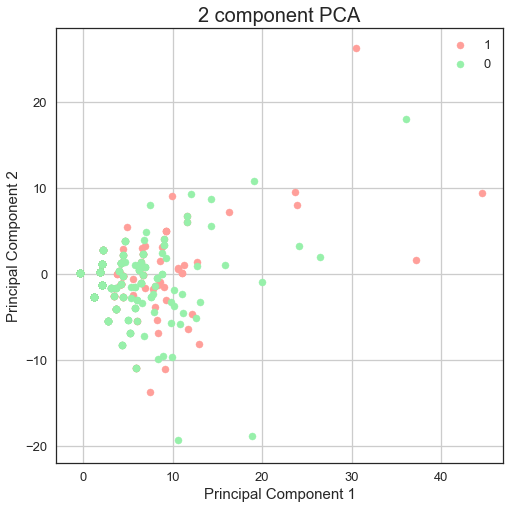

In [210]:
PCA_2components('total_number_')

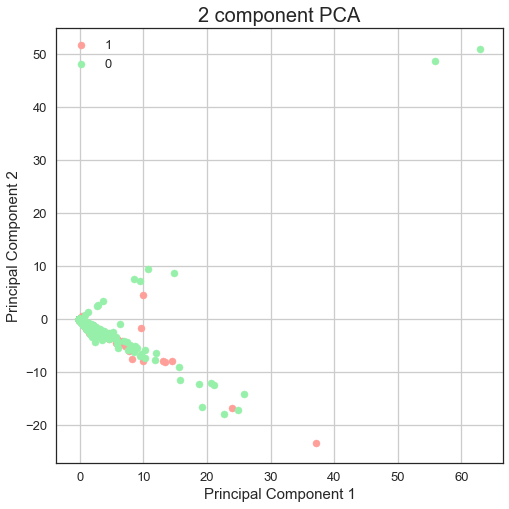

In [211]:
PCA_2components('unpaid_balance_')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001876EE10>,
      dtype=object)

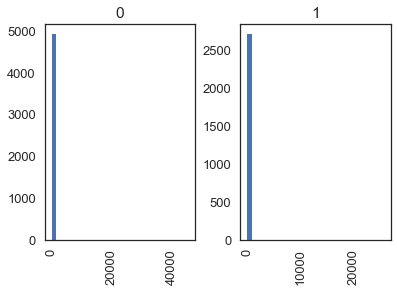

In [213]:
df_clean.hist(column="unpaid_balance_consumer_credit_balance",by="Badness7D",bins=30)